In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [98]:
df = pd.read_csv("Fish.csv")

In [99]:
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [100]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [101]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [103]:
import seaborn as sns
df.describe(include='object')

,Species
count,159
unique,7
top,Perch
freq,56


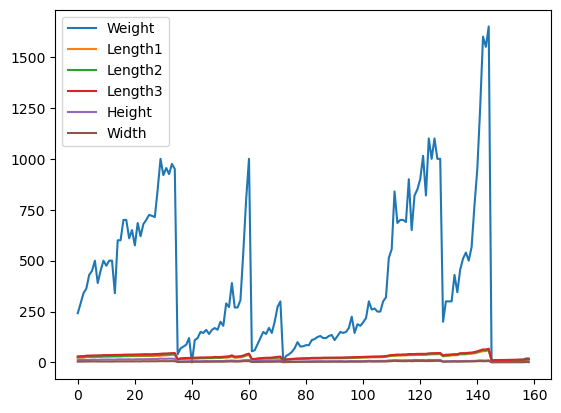

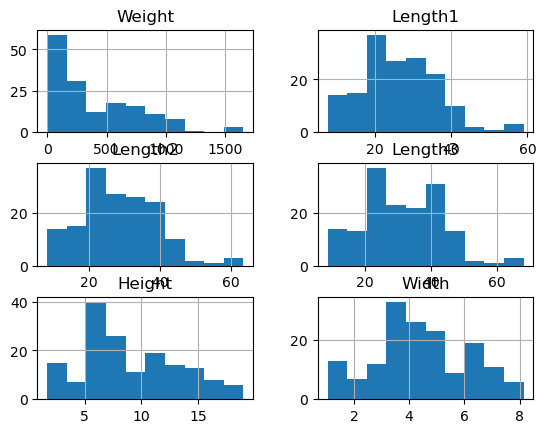

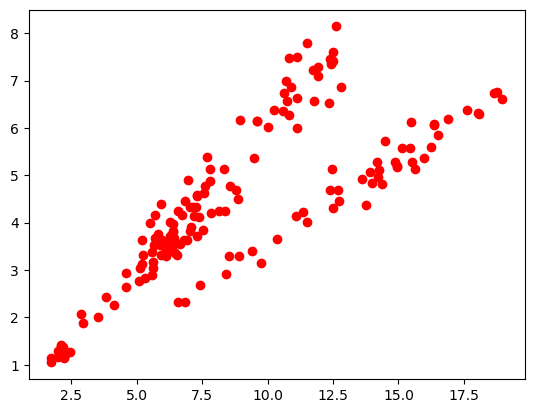

In [104]:
import matplotlib.pyplot as plt
df.plot()
df.hist()
plt.show()
plt.scatter(df["Height"],df["Width"],color="red")
plt.show()

In [105]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
onehotEnc = preprocessing.OneHotEncoder()

In [108]:
spc = df[['Species']]
spc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Species  159 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [75]:
from sklearn.preprocessing import LabelEncoder

In [78]:
labelEnc = preprocessing.LabelEncoder()

In [79]:
new_target = labelEnc.fit_transform(spc)
new_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [80]:
onehotEnc.fit(new_target.reshape(-1, 1))

OneHotEncoder()

In [84]:
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1)).toarray()

In [86]:
print("The original data")
print(spc)
print("The transform data using OneHotEncoder")
print(targets_trans)

The original data
    Species
0     Bream
1     Bream
2     Bream
3     Bream
4     Bream
..      ...
154   Smelt
155   Smelt
156   Smelt
157   Smelt
158   Smelt

[159 rows x 1 columns]
The transform data using OneHotEncoder
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [93]:
df = df.drop(['Species'],axis=1)

In [116]:
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

<AxesSubplot:xlabel='Species', ylabel='count'>

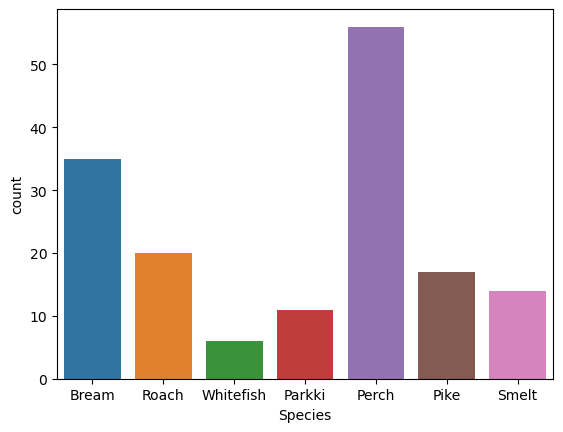

In [118]:
import seaborn as sns
sns.countplot(x=df['Species'])

In [110]:
s1 = pd.DataFrame(data=targets_trans,index=range(159),columns=['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish'])
s1

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
s_data = pd.concat([s1,df],axis=1)
s_data = s_data.drop(['Species'],axis=1)
s_data

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Weight,Length1,Length2,Length3,Height,Width
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2,11.5,12.2,13.4,2.0904,1.3936
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.4,11.7,12.4,13.5,2.4300,1.2690
156,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2,12.1,13.0,13.8,2.2770,1.2558
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

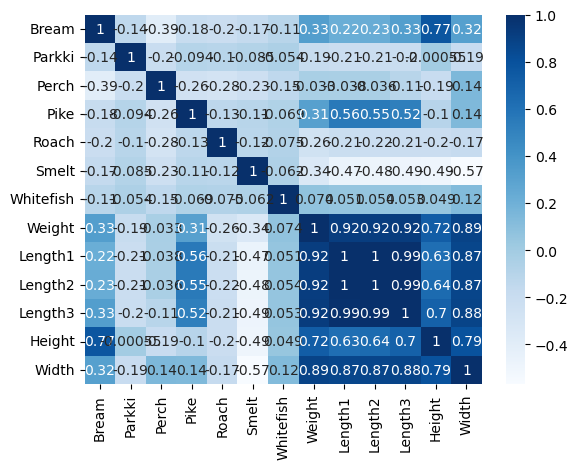

In [115]:
sns.heatmap(s_data.corr(), annot=True, cmap='Blues')

In [120]:
x = s_data.drop(["Weight"],axis=1)

In [124]:
y = s_data[['Weight']]
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


In [192]:
from sklearn.model_selection import train_test_split

In [193]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [194]:
x_train.shape

(127, 12)

In [195]:
x_test.shape

(32, 12)

In [196]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [197]:
model = model.fit(x_train,y_train)

In [198]:
print('Model intercept: ', model.intercept_)
print('Model coefficients: ', model.coef_)
print('Model score: ', model.score(x, y))
print('Model score: ', model.score(x_train, y_train))

Model intercept:  [-749.59303022]
Model coefficients:  [[-180.89673957  -57.03657489   48.79908164 -109.96599502   15.20537302
   351.38740847  -67.49255364  -71.73958808   76.67271467   16.28970884
    32.13498485   13.20175457]]
Model score:  0.9277529392894258
Model score:  0.9342848664059864


In [199]:
y_pred = model.predict(x_test)

In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("R2: %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, y_pred)))

R2: 0.910
MSE: 17086.820
RMSE: 130.717
MAE: 9.418


In [201]:
x_sm = sm.add_constant(x_train)
sm_model = sm.OLS(y_train, x_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     148.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.50e-62
Time:                        14:14:51   Log-Likelihood:                -744.32
No. Observations:                 127   AIC:                             1513.
Df Residuals:                     115   BIC:                             1547.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -655.8939     54.068    -12.131      0.0

In [202]:
import statsmodels.api as sm 

In [203]:
s = np.append(arr = np.ones((159,1)),values=s_data.iloc[:,:-1],axis=1) 
s

array([[ 1.    ,  1.    ,  0.    , ..., 25.4   , 30.    , 11.52  ],
       [ 1.    ,  1.    ,  0.    , ..., 26.3   , 31.2   , 12.48  ],
       [ 1.    ,  1.    ,  0.    , ..., 26.5   , 31.1   , 12.3778],
       ...,
       [ 1.    ,  0.    ,  0.    , ..., 13.    , 13.8   ,  2.277 ],
       [ 1.    ,  0.    ,  0.    , ..., 14.3   , 15.2   ,  2.8728],
       [ 1.    ,  0.    ,  0.    , ..., 15.    , 16.2   ,  2.9322]])

In [204]:
x_l = s_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
x_l = np.array(x_l,dtype=float)

In [205]:
ols_scores = sm.OLS(y,x_l).fit()
print(ols_scores.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.903e+29
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:14:58   Log-Likelihood:                 4001.0
No. Observations:                 159   AIC:                            -7976.
Df Residuals:                     146   BIC:                            -7936.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.411e-13   4.69e-12      0.073      0.9

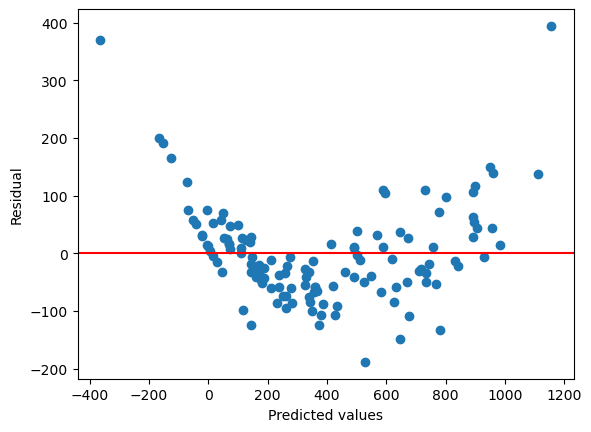

In [206]:
residuals = sm_model.resid

plt.scatter(sm_model.predict(), residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.show()

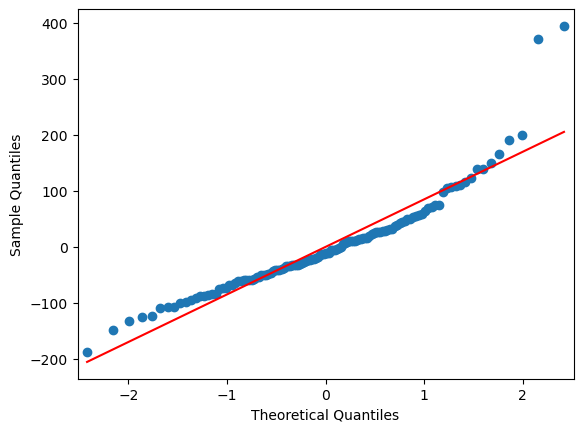

In [207]:
pplot = sm.ProbPlot(residuals)
fig = pplot.qqplot(line='s')
plt.show()

In [208]:
X = s_data.drop(columns=['Weight', 'Length3', 'Length2'])
y = s_data[['Weight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [210]:
y_hat = lr.predict(X_test)

In [211]:
print("R2: %.3f" % r2_score(y_test, y_hat))
print("MSE: %.3f" % mean_squared_error(y_test, y_hat))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, y_hat)))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, y_hat)))

R2: 0.941
MSE: 8431.409
RMSE: 91.823
MAE: 8.275


In [212]:
X_sm = sm.add_constant(X)
sm_model = sm.OLS(y, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     223.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           9.38e-82
Time:                        14:15:11   Log-Likelihood:                -947.68
No. Observations:                 159   AIC:                             1915.
Df Residuals:                     149   BIC:                             1946.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -626.6848     31.607    -19.828      0.0

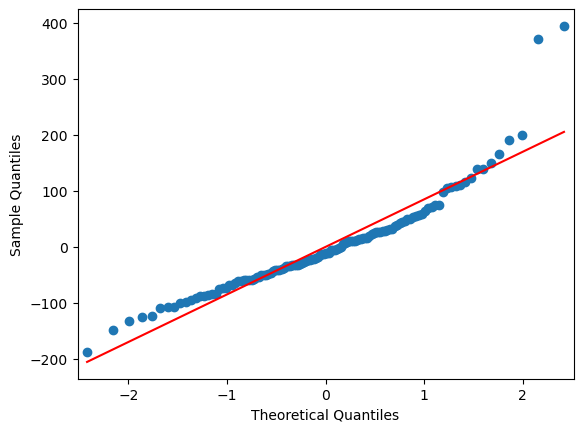

In [213]:
pplot = sm.ProbPlot(residuals)
fig = pplot.qqplot(line='s')
plt.show()

In [218]:
print("Train Accuracy:", lr.score(X_train,y_train))

Train Accuracy: 0.9244982059509208


In [221]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [222]:
x_st = sc.fit_transform(X)

In [223]:
y_st = sc.fit_transform(y)

In [224]:
from sklearn.svm import SVR

In [231]:
svr_reg = SVR(kernel="rbf")
svr_reg.fit(x_st,y_st)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [229]:
x_st.shape

(159, 10)

In [230]:
y_st.shape

(159, 1)

In [237]:
print("SVR accuracy: ",svr_reg.score(x_st,y_st))

SVR accuracy:  0.9620467466775827


In [235]:
X_sm = sm.add_constant(x_st)
sm_model = sm.OLS(y_st, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     223.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           9.38e-82
Time:                        14:31:18   Log-Likelihood:                -13.187
No. Observations:                 159   AIC:                             46.37
Df Residuals:                     149   BIC:                             77.06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.255e-17      0.022   1.05e-15      1.0